# 텍스트 전처리
1. 토큰화
2. 정제
3. 정규화 

## 토큰화(Tokenization)
#### 주어진 코퍼스를 토큰 단위로 나누기
##### 토큰 : 의미를 가지고 있는 최소 단위

### 문장 토큰화
- 코퍼스를 문장 단위로 분류
- 마침표(.)는 문장의 끝이 아니어도 등장할 수 있으므로 주의

In [2]:
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [3]:
# 문장의 끝을 나타내지 않는 마침표가 존재할 때

text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


#### 한국어 문장 토큰화
##### KSS(Korean Sentence Splitter)

In [4]:
!pip install kss

     |████████████████████████████████| 42.4 MB 1.3 MB/s 
     |████████████████████████████████| 175 kB 57.9 MB/s 
  Created wheel for kss: filename=kss-3.4.2-py3-none-any.whl size=42448069 sha256=d6b557a56d2342e0e3d6f282febc8be3d9c3ca3ede4ac3efbfad013f4c249c0f
  Stored in directory: /root/.cache/pip/wheels/ef/22/aa/6399b60516a067ec97fa6599fb2d472aeb25e3f9ee6dae3224
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=fd637fd4d21f32da7e2d17b2bcf8c5688794b5af58a50bf51264fabbd6fb6930
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built kss emoji


In [5]:
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :',kss.split_sentences(text))

[Korean Sentence Splitter]: Initializing Pynori...


한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


### 단어 토큰화(Word Tokenization)
- 단어 단위로 토큰화
- **축약어(can't 등)**의 경우에는 여러 방법 존재

In [6]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize      # 공백, 구두점 단위 tokenize
from nltk.tokenize import WordPunctTokenizer # 모든 구두점 단위 tokenize
from tensorflow.keras.preprocessing.text import text_to_word_sequence # 소문자 변환, 구두점 제거

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
s1 = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."

print('word_tokenizer :', word_tokenize(s1))
print('WordPunctTokenizer :', WordPunctTokenizer().tokenize(s1))
print('text_to_word_sequence :', text_to_word_sequence(s1))

word_tokenizer : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
WordPunctTokenizer : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']
text_to_word_sequence : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


#### 토큰화 시 주의사항
1. 구두점이나 특수 문자를 단순 제외해서는 안 된다.
  - 마침표 : 문장의 끝을 알 수 있음
  - 단어 내에 구두점이 있는 경우   
    - m.p.h, Ph.D, AT&T
  - 특수 문자
    - $45.55, 22/04/08, 123,456,789
2. 아포스트로피(')를 사용한 줄임말
  - what'**re** -> what **are**, we'**re** -> we **are**
  - **re**를 접어라고 한다.
3. 단어 내에 띄어쓰기가 있는 경우
  - New York, rock 'n' roll 등

#### 표준 토큰화
##### Penn Treebank Tokenization의 규칙
1. 하이푼으로 구성된 단어는 하나로 유지한다.
2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.

In [8]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


## 정제(Cleaning) and 정규화(Normalization)
- 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다.
- 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.

\>> 완벽한 정제는 불가능하기에, 일종의 합의점을 찾아야 한다.

### 1. 규칙에 기반한 표기가 다른 단어들의 통합
- 표기가 다른 단어들을 하나의 단어로 정규화 하는 작업
> USA, US 는 동일한 의미를 갖고있다.
> uh-huh, uhhuh 등
- 어간 추출. 표제어 추출

    - 표기가 다른 단어들을 통합하는 방법

### 2. 대, 소문자 통합
- 대, 소문자 통합 작업은 대부분 대문자를 소문자로 변환하는 소문자 변환작업으로 이루어지게 됩니다.
- 검색엔진에서 매칭이 용이해진다.

#### 주의사항
- 미국 US vs 우리 us 와 같이 대소문자가 의미를 구분하는 경우가 있다.
- 회사 이름이나 사람이름 등은 대문자로 유지하는게 옳다.

### 3. 불필요한 단어 제거
- 분석하고자 하는 목적에 맞지 않는 단어들을 노이즈 데이터라고 한다.
- 불용어 제거, 등장 빈도수가 적은 단어, 길이가 짧은 단어를 제거하는 방법 등이 있다.

#### 1. 등장 빈도가 적은 단어
- 너무 적게 등장해 자연어 처리에 도움이 되지 않는 단어들이 있다.
  - 총 100,000개의 메일, 평균 500개 단어가 있는 데이터 셋이 있다고 하자.
  - 이 데이터에 총 5번 나오는 단어는 직관적으로 분류에 거의 도움이 되지않는다.


#### 2. 길이가 짧은 단어
- 영어권 언어에서 길이가 짧은 단어는 대부분 불용어에 해당한다.
- 불용어 제거와 더불어 구두점들까지도 한꺼번에 제거하는 효과가 있다
- 다만, 한국어는 이런 방법이 유효하지 않을 수 있다.
  - 한국어의 평균 단어는 2~3 글자이다
  - 한국어에서 한 글자와 영어의 한 글자는 의미가 다르다.
    - 한국어의 표의 문자에서는 한 글자에도 많은 정보가 담겨있다.

In [9]:
import re

text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


## 어간 추출(Stemming) and 표제어 추출(Lemmatization)
- 눈으로 봤을 때는 서로 다른 단어들이지만, 하나의 단어로 일반화시킬 수 있다면 하나의 단어로 일반화시켜서 문서 내의 단어 수를 줄일 수 있다.
- 자연어 처리에서 전처리, 더 정확히는 정규화의 지향점은 언제나 갖고 있는 코퍼스로부터 복잡성을 줄이는 일입니다.


### 1. 표제어 추출(Lemmatization)
- 표제어 : '기본 사전형 단어' 정도의 의미.
> am, are, is 는 서로 다른 스펠링이지만 뿌리 단어는 be이다.
> 위 세 단어의 표제어는 'be'라고 할 수 있다.


#### 1. 어간(stem)
- 단어의 의미를 담고있는 단어의 핵심부분  

#### 2. 접사(affix)
- 단어에 추가적인 의미를 주는 부분

- 가장 섬세한 표제어 추출 방식은 **형태학적 파싱**이다.
  - 형태학적 파싱은 어간과 접사를 분리하는 작업을 말한다.
  >  cats라는 단어에 대해 형태학적 파싱을 수행한다면, 형태학적 파싱은 결과로 cat(어간)와 -s(접사)를 분리합니다.


In [10]:
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :', [lemmatizer.lemmatize(word) for word in words])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


- 표제어 추출은  단어의 형태가 적절히 보존되는 양상을 보이는 특징이 있다.
- 그럼에도 위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력하고 있다.
  - 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문이다.

- 표제어 추출은 문맥을 고려하며 수행했을 때의 결과는 해당 단어의 품사 정보를 보존한다.
  - 하지만 어간 추출을 수행한 결과는 품사 정보가 보존되지 않는다.
  - 더 정확히는 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많다.

In [11]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [12]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [13]:
lemmatizer.lemmatize('has', 'v')

'have'

### 2. 어간 추출
- 어간(Stem)을 추출하는 작업
- 형태학적 분석을 단순화한 버전, 혹은 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있다.
- 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 결과 단어는 사전에 존재하지 않는 단어일 수도 있다.

In [14]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[stemmer.stem(word) for word in tokenized_sentence])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


- 규칙 기반의 접근을 하고 있으므로 어간 추출 후의 결과에는 사전에 없는 단어들도 포함되어 있다.
  - 가령, 포터 알고리즘의 어간 추출은 이러한 규칙들을 가집니다.

>ALIZE → AL
>
>ANCE → 제거
>
>ICAL → IC

- 위의 규칙에 따르면 좌측의 단어는 우측의 단어와 같은 결과를 얻게된다.

> formalize → formal
>
> allowance → allow
>
> electricical → electric

In [15]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 :',words)
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']
어간 추출 후 : ['formal', 'allow', 'electric']


- 어간 추출 속도는 표제어 추출보다 일반적으로 빠른데, 포터 어간 추출기는 정밀하게 설계되어 정확도가 높다. 
  - 따라서 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택임. 
- NLTK에서는 포터 알고리즘 외에도 랭커스터 스태머(Lancaster Stemmer) 알고리즘을 지원합니다.

이 둘을 비교해보자.

In [16]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


>포터 스테머 : doing → do, going → go, starting → start  
랭커스터 스테머 : starting → start
- 서로 다른 알고리즘을 사용하므로 코퍼스에 적용해 본 후 적합성을 판단하여 사용해야 한다.

- 알고리즘이 제대로 된 일반화를 수행하지 못할 수 있다.
  - 지나치게 일반화 되는 경우
  - 일반화가 부족한 경우
- 포터 알고리즘으로 organization을 어간 추출했을 때
> organization → organ  

  - organization과 organ은 완전히 다른 단어
  - organ의 어간을 추출하면 organ이므로 두 단어는 동일한 어간을 갖게 된다.

- 동일한 단어에 표제어 추출과 어간 추출을 수행했을 때
  - **표제어 추출(Lemmatization)**
  > am → be  
  > the going → the going  
  > having → have

  - **어간 추출(Stemming)**
  > am → am   
  > the going → the go  
  > having → hav    

## 불용어(Stopword)
- 큰 의미가 없는 단어
  - 자주 등장하지만 분석에 도움이 되지 않는 단어
  - I, my, me, over, 조사, 접미사 등
- 유의미한 단어 토큰만을 선별하기 위해 불용어를 제거하는 작업이 필요하다.

In [17]:
!pip install konlpy
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

     |████████████████████████████████| 19.4 MB 1.6 MB/s 
     |████████████████████████████████| 448 kB 44.5 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


### NLIK를 통해 불용어 제거하기

In [19]:
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for word in word_tokens: 
    if word not in stop_words: 
        result.append(word) 

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


### 한국어에서 불용어 제거하기
- 토큰화 후 조사, 접속사 등을 제거한다.
- 명사, 형용사와 같은 단어 중 불용어로 제거하고 싶은 단어가 있을 때
  - 사용자가 직접 불용어 사전을 만든다.

In [20]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


## 정수 인코딩

- 단어그대로 넣을 수 없으니 정수로 전환하는 과정
- 각 단어를 고유한 정수에 맵핑(mapping) (=인덱스 부여)
- 인덱스는 랜덤으로 부여하는 경우도 있지만 보통은 단어 등장 빈도수를 기준으로 부여한다.

In [4]:
# 다양한 방법이 있으나 keras의 Toknenizer 사용

from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], 
                          ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], 
                          ['barber', 'went', 'huge', 'mountain']]

In [6]:
tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences) 

In [7]:
print(tokenizer.word_index)
print(tokenizer.index_word)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}
{1: 'barber', 2: 'secret', 3: 'huge', 4: 'kept', 5: 'person', 6: 'word', 7: 'keeping', 8: 'good', 9: 'knew', 10: 'driving', 11: 'crazy', 12: 'went', 13: 'mountain'}


In [8]:
# 각 단어의 빈도수가 높은 순서대로 인덱스가 부여된 것을 확인할 수 있습니다. 
# 각 단어가 카운트를 수행하였을 때 몇 개였는지를 보고자 한다면 word_counts를 사용합니다.
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [9]:
# texts_to_sequences()는 입력으로 들어온 코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환합니다.
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [13]:
# 상위 5개 단어만 사용하고싶다면 tokenizer에 지정해주면 된다.
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) 
tokenizer.fit_on_texts(preprocessed_sentences)

In [14]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [29]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [30]:
# 케라스 토크나이저는 기본적으로 단어 집합에 없는 단어인 OOV에 대해서는 단어를 정수로 바꾸는 과정에서 아예 단어를 제거한다는 특징이 있습니다. 
# 단어 집합에 없는 단어들은 OOV로 간주하여 보존하고 싶다면 Tokenizer의 인자 oov_token을 사용합니다. oov의 인덱스는 1

# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentences)

In [31]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


## 패딩(Padding)
- 길이가 다른 여러 문장의 길이를 동일하게 맞춰주는 작업   

### 1. Numpy로 패딩하기

In [32]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [33]:
preprocessed_sentences = [['barber', 'person'], 
                          ['barber', 'good', 'person'], 
                          ['barber', 'huge', 'person'], 
                          ['knew', 'secret'], 
                          ['secret', 'kept', 'huge', 'secret'], 
                          ['huge', 'secret'], 
                          ['barber', 'kept', 'word'], 
                          ['barber', 'kept', 'word'], 
                          ['barber', 'kept', 'secret'], 
                          ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], 
                          ['barber', 'went', 'huge', 'mountain']]


In [34]:
# 정수 인코딩을 수행하여 모든 단어를 고유 정수로 변환한다.

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [35]:
# 가장 길이가 긴 문장 길이 계산

max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)

최대 길이 : 7


In [36]:
# 모든 문장의 길이를 7로 맞춰준다.
# 길이가 7보다 짧은 문장에 숫자 0을 채운다.
# 숫자 0을 사용하였으므로 제로 패딩(zero padding)

for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

### 2. 케라스 전처리 도구로 패딩하기

In [37]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
# 정수 인코딩 결과

encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [39]:
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]], dtype=int32)

- Numpy : 문서의 뒤에 0을 채운다.
- Keras : 문서의 앞에 0을 채운다.
  - 뒤에 0을 채우고 싶다면 padding='post' 인자 사용

In [40]:
padded = pad_sequences(encoded, padding='post') 
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]], dtype=int32)

In [41]:
# 두 결과가 동일한지 비교

(padded == padded_np).all()

True

### 패딩 길이를 제한하기
- 모든 문서의 평균 길이가 20인데 문서 1개의 길이가 5000일 때
  - 5000으로 패딩하는 것은 비효율적이다.
- maxlen 인자를 사용해 패딩할 길이를 제한할 수 있다.
- 길이가 maxlen보다 긴 문장은 데이터가 손실된다.

In [42]:
padded = pad_sequences(encoded, padding='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]], dtype=int32)

- [ 7, 7, 3, 2, 10, 1, 11] -> [ 3, 2, 10, 1, 11]
  - 앞의 단어 데이터가 손실된다.
- 뒤쪽 단어가 삭제되도록 하고 싶다면 truncating='post' 인자를 사용한다.

### 0이 아닌 숫자로 패딩하기

In [43]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


In [44]:
padded = pad_sequences(encoded, padding='post', value=last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]], dtype=int32)

## 원-핫 인코딩(One-Hot Encoding)
- **단어 집합**
  - 서로 다른 단어들의 집합
  - 같은 단어의 변형 형태(book, books 등)도 다른 단어로 간주한다.
- 단어 집합을 만들고 인덱스를 사용해 **원-핫 벡터(One-Hot vector)**를 만든다.
- 원-핫 인코딩 과정
  1. 정수 인코딩으로 각 단어에 고유 정수를 부여한다.
  2. 고유 정수를 인덱스로 하여 원-핫 벡터를 만든다.

In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# keras tokenizer를 사용한 정수 인코딩

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print('단어 집합 :',tokenizer.word_index)

단어 집합 : {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [46]:
# sub_text를 정수 배열로 바꿨을 때

sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [47]:
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


### 원-핫 인코딩(One-Hot Encoding)의 한계
- 단어 개수가 늘어날 수록, 벡터 저장에 필요한 공간(벡터의 차원 수)이 계속 늘어난다.
- 단어 간의 유사도를 표현하지 못한다.
  - 검색 시스템 등에서 문제가 될 수 있다.

#### 단어의 잠재 의미를 반영하여 벡터화하기
- 카운트 기반 벡터화
  - LSA(잠재 의미 분석)
  - HAL
- 예측 기반 벡터화
  - NNLM, RNNLM, Word2Vec, FastText 등
- 두 가지 방법 모두 사용
  - GloVe

## 한국어 전처리

### 한국어 형태소 분석

여러가지 형태소 분석기가 존재한다.   
konlpy - Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)


https://url.kr/51pwtx 링크에서 자세한 비교
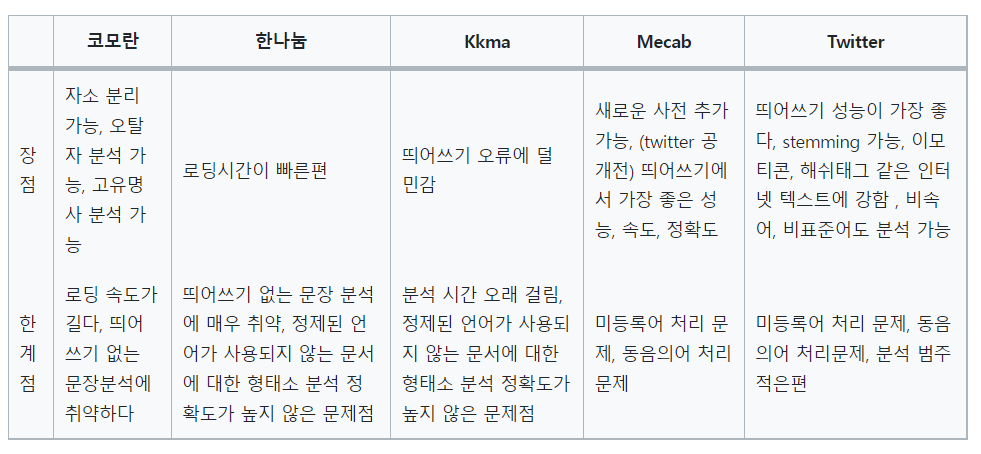

In [48]:
!pip install konlpy

In [49]:
from konlpy.tag import Okt 


In [50]:
okt = Okt()
print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 


OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [2]:
from konlpy.tag import  Mecab

In [3]:
mecab = Mecab()

print('꼬꼬마 형태소 분석 :',mecab.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',mecab.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',mecab.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

꼬꼬마 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '봐요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('한', 'XSA+ETM'), ('당신', 'NP'), (',', 'SC'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가', 'VV'), ('봐요', 'EC+VX+EC')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


### soynlp
soynlp는 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저입니다. 비지도 학습으로 단어 토큰화를 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 단어로 분석합니다

https://url.kr/72angf konlpy 와 soynlp 비교

https://github.com/lovit/soynlp soylnp의 docs

2가지 기준 - 응집확률, 브랜칭 엔트로피

### 응집확률이란?

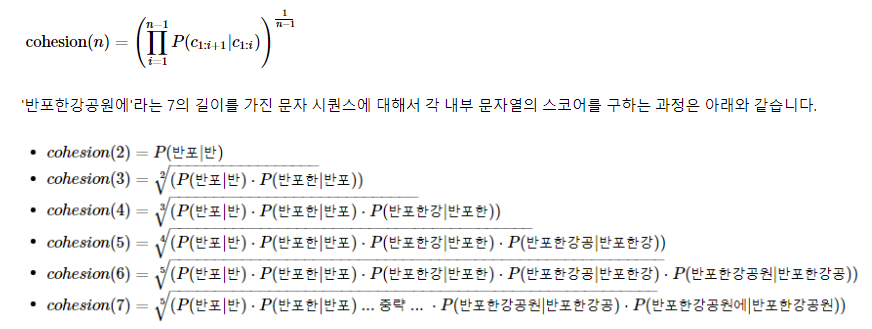

### 브랜칭 엔트로피란?

디스플레이가 ~

디 - 다음에 오는 단어는 뭘까? 

디스 - 다음에 오는 단어는 뭘까?

디스플 - 다음에 오는 단어는 뭘까?  - 예측쉽다

디스플레 - 다음에 오는 단어는 뭘까? - 예측이 가장 쉽다

디스플레이 - 다음에 오는 단어는 뭘까?

In [15]:
!pip install soynlp

     |████████████████████████████████| 416 kB 5.2 MB/s 


In [16]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [17]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7f777d76cc50>)

In [18]:
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [19]:
#학습 시키는 과정

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.530 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


### L tonkenizer

한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많습니다. 예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. 

L 토크나이저는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가지고 있습니다.

In [20]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### MAX tonenizer

최대 점수 토크나이저는 띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저입니다. 

In [21]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

### 그 외에 한국어에 사용할 수 있는 전처리 패키지

### SOYNLP를 이용한 반복되는 문자 정제

SNS나 채팅 데이터와 같은 한국어 데이터의 경우에는 ㅋㅋ, ㅎㅎ 등의 이모티콘의 경우 불필요하게 연속되는 경우가 많은데   
ㅋㅋ, ㅋㅋㅋ, ㅋㅋㅋㅋ와 같은 경우를 모두 서로 다른 단어로 처리하는 것은 불필요합니다.    
이에 반복되는 것은 하나로 정규화시켜줍니다.

In [22]:
from soynlp.normalizer import *

In [23]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


### Customized KoNLPy



In [1]:
!pip install customized_konlpy

     |████████████████████████████████| 881 kB 5.0 MB/s 
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 45.8 MB/s 


In [2]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다.')

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [3]:
#형태소 분석기 Twitter에 add_dictionary('단어', '품사')와 같은 형식으로 사전 추가를 해줄 수 있습니다.
twitter.add_dictionary('은경이', 'Noun')
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']

### Py-Hanspell

Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지입니다

https://github.com/ssut/py-hanspell

In [4]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-jntf_s1w
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-jntf_s1w
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=3089d817114352eb0402c49dbb3f14e93020b91a095ef9704d0eb49737e6014d
  Stored in directory: /tmp/pip-ephem-wheel-cache-66mqd_n1/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [5]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지
